<h1 align="center">Variables Aleatorias y sus Momentos Centrales.</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>

Una <a href="https://es.wikipedia.org/wiki/Variable_aleatoria" target="_blank">variable aleatoria</a> corresponde con una variable asociada a un experimento aleatorio.  Estas variables tienen asociada una cierta distribución estadística y se pueden describir en términos de sus <a href="https://en.wikipedia.org/wiki/Central_moment" target="_blank">momentos centrales</a>.   

En este Jupyter Notebook se explorarán las variables aleatorias y sus momentos centrales.

## 1. Cargar librerias

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## 2. Ejemplos
A continuación, se presentan ejemplos de variables aleatorias y no aleatorias.

### 2.1. Variable aleatoria, $X$
Una <a href="https://es.wikipedia.org/wiki/Variable_aleatoria" target="_blank">variable aleatoria</a> corresponde con una variable asociada a un experimento aleatorio.

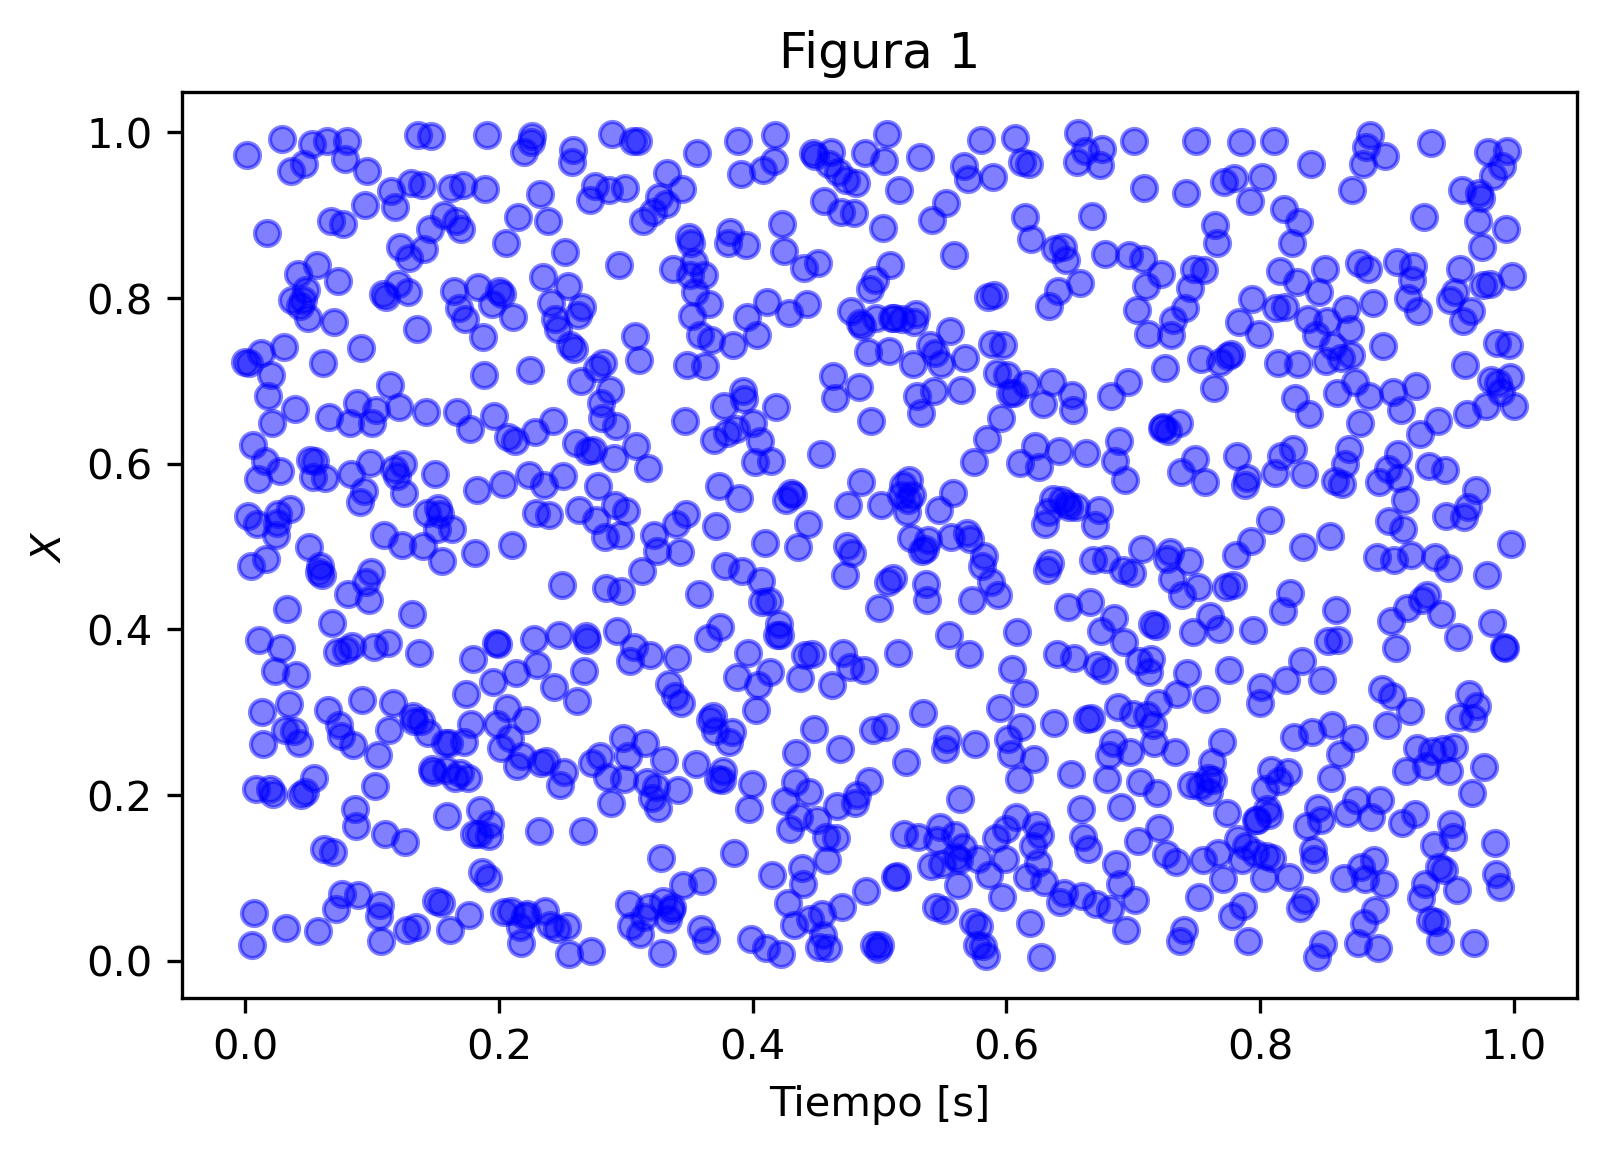

In [2]:
t  = np.linspace(0, 1, 1000) # [s]
X = np.random.rand(len(t))
dpi = 300
plt.figure(dpi=dpi)
plt.plot(t, X, 'bo', alpha=0.5)
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$X$')
_ = plt.title('Figura 1')

### 2.2. Variable no aleatoria
Una variable determinística se caracteriza porque los valores que puede tomar bajo ciertas condiciones se pueden predir con precisión, es decir, siempre se puede conocer el valor correspondiente de la variable si se mantienen las condiciones del experimento.

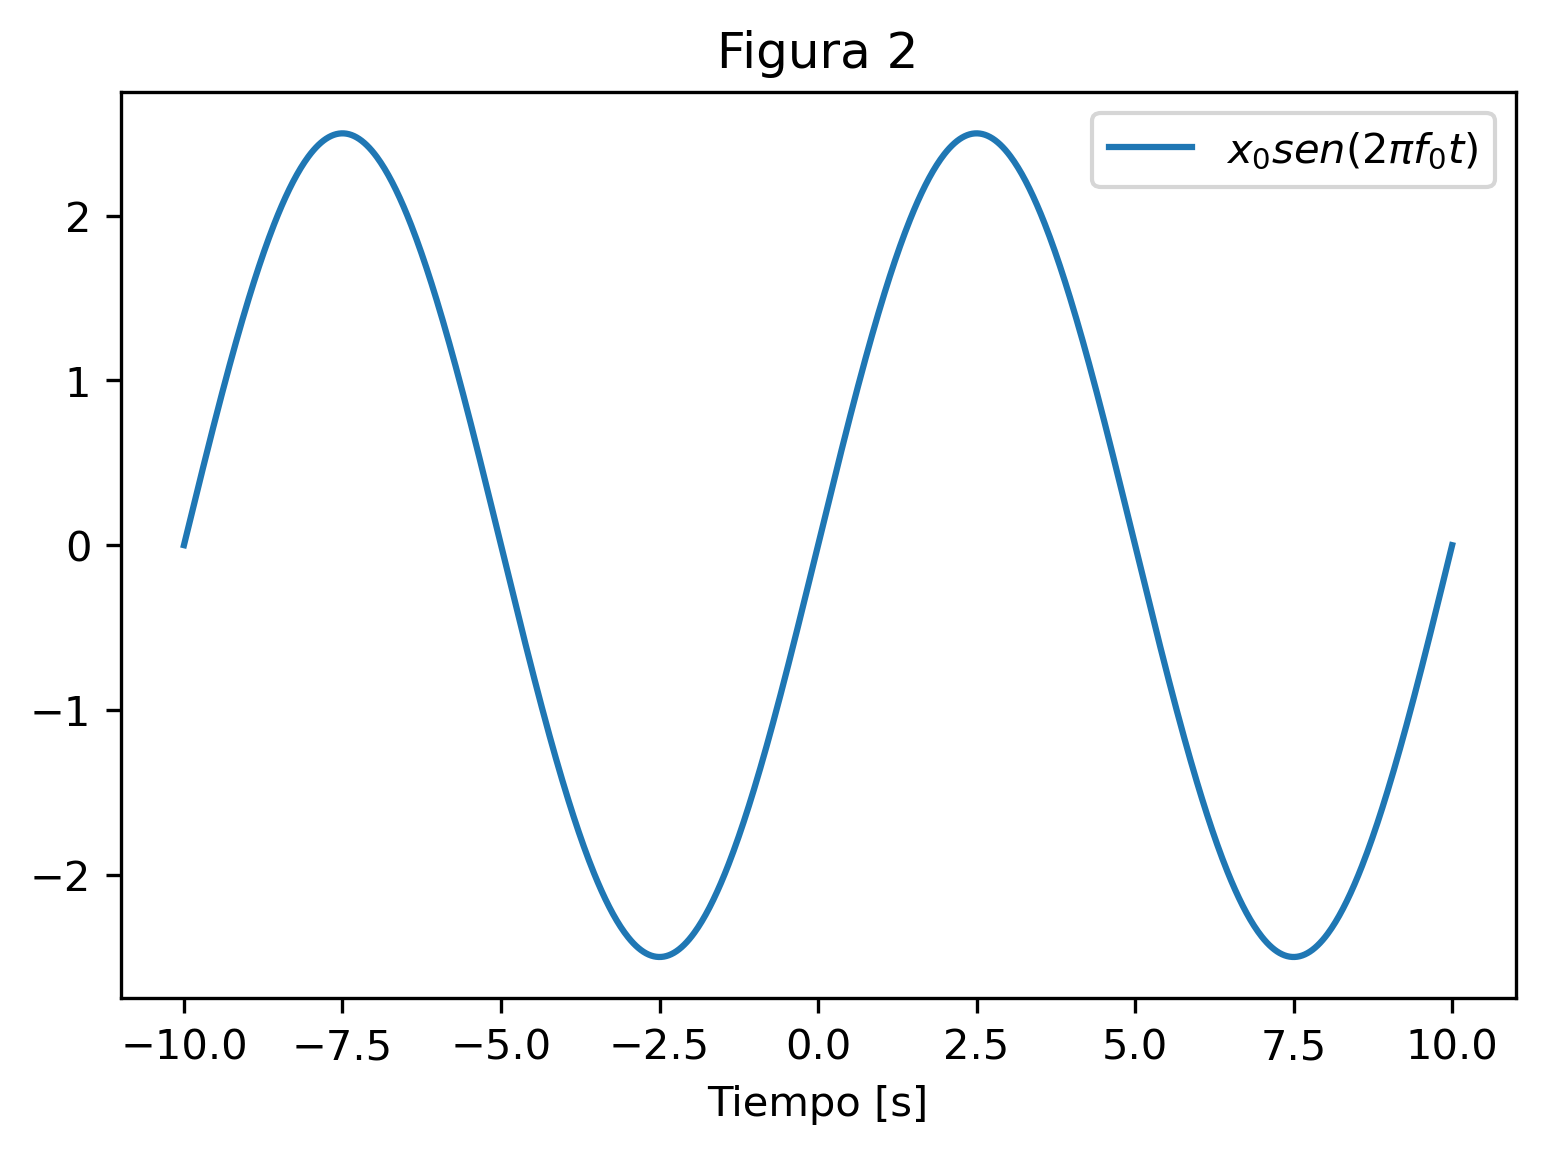

In [3]:
fo = 0.1 # [Hz]
t  = np.linspace(-1/fo, 1/fo, 1000) # [s]
x  = 2.5 * np.sin(2 * np.pi * fo * t)
dpi = 300
plt.figure(dpi=dpi)
plt.plot(t, x, label=r'$x_0 sen(2\pi f_0 t)$')
plt.legend()
plt.xlabel('Tiempo [s]')
_ = plt.title('Figura 2')

## 3. Distribución de Probabilidad, $F_X(x)$
Cada suceso definido sobre una cierta variable aleatoria $X$ tiene asociado una [distribución de probabilidad](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) $F_X(x)$.  En la práctica, al tener un número finito de datos, la distribución de probabilidad que se puede obtener a partir de los datos corresponde con la distribución de frecuencias, que corresponde al número de ocurrencias de un suceso en un cierto rango de la variable aleatoria.

## 4. Métodos para graficar $X$ y $F_X(x)$

In [4]:
def plotX(X, dpi=dpi, title=''):
    N = len(X)
    mu = np.mean(X)
    sigma = np.std(X)
    plt.figure(dpi=dpi)
    plt.plot(X, 'ob', alpha=0.3)
    plt.xlabel('Experimento')
    plt.hlines(mu, 0, N, color='r', lw=2, label=r'$\mu$')
    plt.hlines(mu+sigma, 0, N, color='r', linestyles=':', label=r'$\mu\pm\sigma$')
    plt.hlines(mu-sigma, 0, N, color='r', linestyles=':')
    plt.legend()
    plt.ylabel('Variable aleatoria, X')
    _ = plt.title(title)

In [5]:
def plotXF(X, F, dpi=dpi, bar_width=0.2, title=''):
    N = len(X)
    mu = np.mean(X)
    sigma = np.std(X)
    plt.figure(dpi=dpi)
    plt.bar(x, F, color='k', 
                width=bar_width,
                alpha=0.5, 
                label=r'Distribución de probabilidad, $F(x;n,p)$')
    plt.plot(X, 1.1*max(F)*np.ones(size), 
                'ob', ms=8, alpha=0.05, 
                label='Variable aleatoria, X')
    plt.axis([min(x), max(x), 0, 1.8*max(F)])
    xticks, texts = plt.xticks()
    plt.xlabel('x')
    plt.vlines(mu, 0, N, color='r', lw=2, label=r'$\mu$')
    plt.vlines(mu+sigma, 0, N, color='r', linestyles=':', label=r'$\mu\pm\sigma$')
    plt.vlines(mu-sigma, 0, N, color='r', linestyles=':')
    plt.legend()
    plt.legend(loc=9)
    _ = plt.title(title)

## 5. Variable Aleatoria Binomial
Una variable aleatoria binomial está caracterizada por la siguiente distribución de probabilidad.

$$F_X(x;p, n) = F(x;p, n) = P[X=x] = \frac{n!}{x!(n-x)!} p^x (1-p)^{n-x}$$

### 5.1. Métodos

In [6]:
def X_binomial(n, p, size=100):
    if n != int(n):
        print('\nError! n must be an integer.')
        return np.array([])
    if np.abs(p) > 1:
        print("Error! p doesn't satisfy |p| ≤ 0.")
        return err
    return np.random.binomial(int(n), p, size=size)

In [7]:
def dist_binomial(x, n, p):
    fact = np.math.factorial
    comb = 1
    if type(x) == type(np.array([])) or type(x) == type([]):
        fact_ = lambda y: fact(n)/(fact(y)*fact(n-y))
        comb = np.array([fact_(yk) for yk in x])
    else:
        comb = fact(n) / (fact(x)*fact(n-x))
    return comb * np.power(p, x) * np.power(1-p, n-x) 

### 5.2. Figuras

In [8]:
n = 40; p = 0.5; size = 1000
x = 1 + np.arange(n)
F = dist_binomial(x, n, p)
X = X_binomial(n, p, size=size)

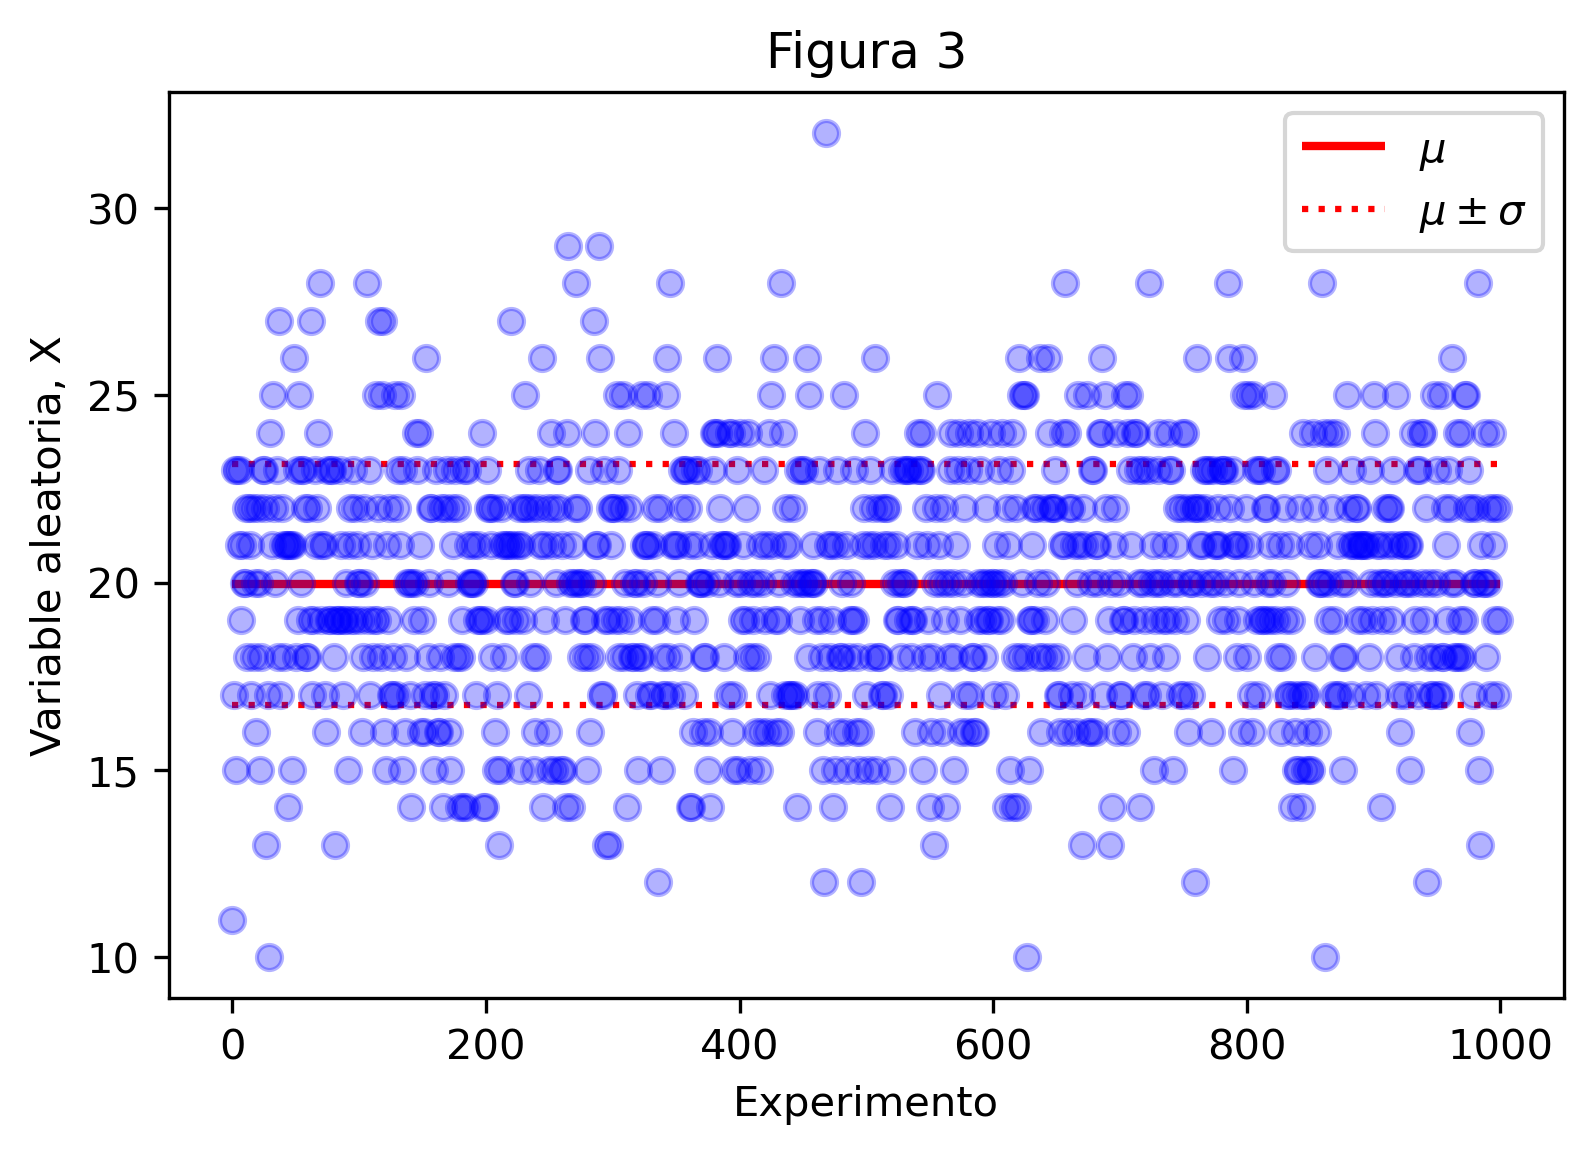

In [9]:
plotX(X, dpi=dpi, title='Figura 3')

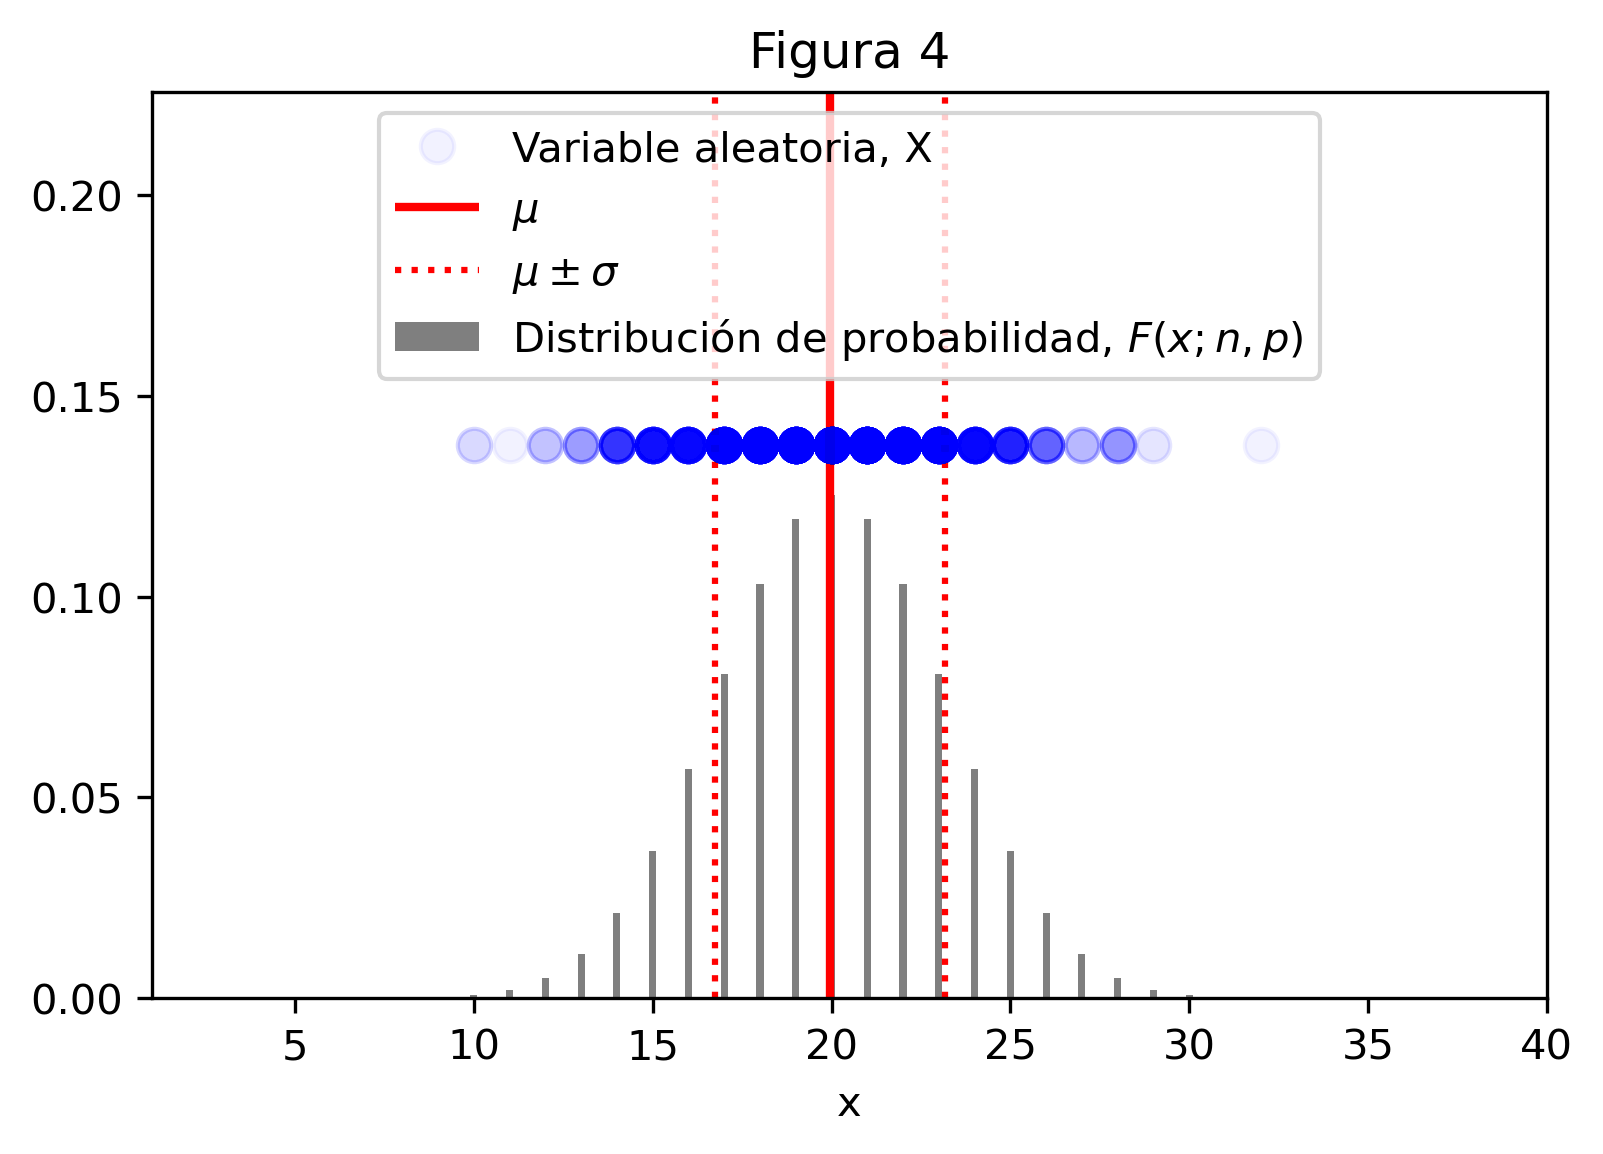

In [10]:
plotXF(X, F, dpi=dpi, bar_width=0.2, title='Figura 4')

## 6. Variable Aleatoria Normal
Una variable aleatoria binomial está caracterizada por la siguiente distribución de probabilidad.

$$F_X(x;\mu, \sigma) = F(x;\mu, \sigma) = P[X=x] = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

### 6.1. Métodos

In [11]:
def X_normal(mu, sigma, size=100):
    if sigma < 0:
        print('Error! Sigma must be positive.')
        return np.array([])
    return np.random.normal(loc=mu, scale=sigma, size=size)

In [12]:
def dist_normal(x, mu, sigma):
    norm = 1/np.sqrt(2*np.pi*sigma**2)
    return norm*np.exp(-(x-mu)**2 / (2*sigma**2))

### 6.2. Figuras

In [13]:
mu = 10.5; sigma = 2.5; size = 1000
X = X_normal(mu, sigma, size=size)
x = np.linspace(min(X), max(X), 50)
F = dist_normal(x, mu, sigma)

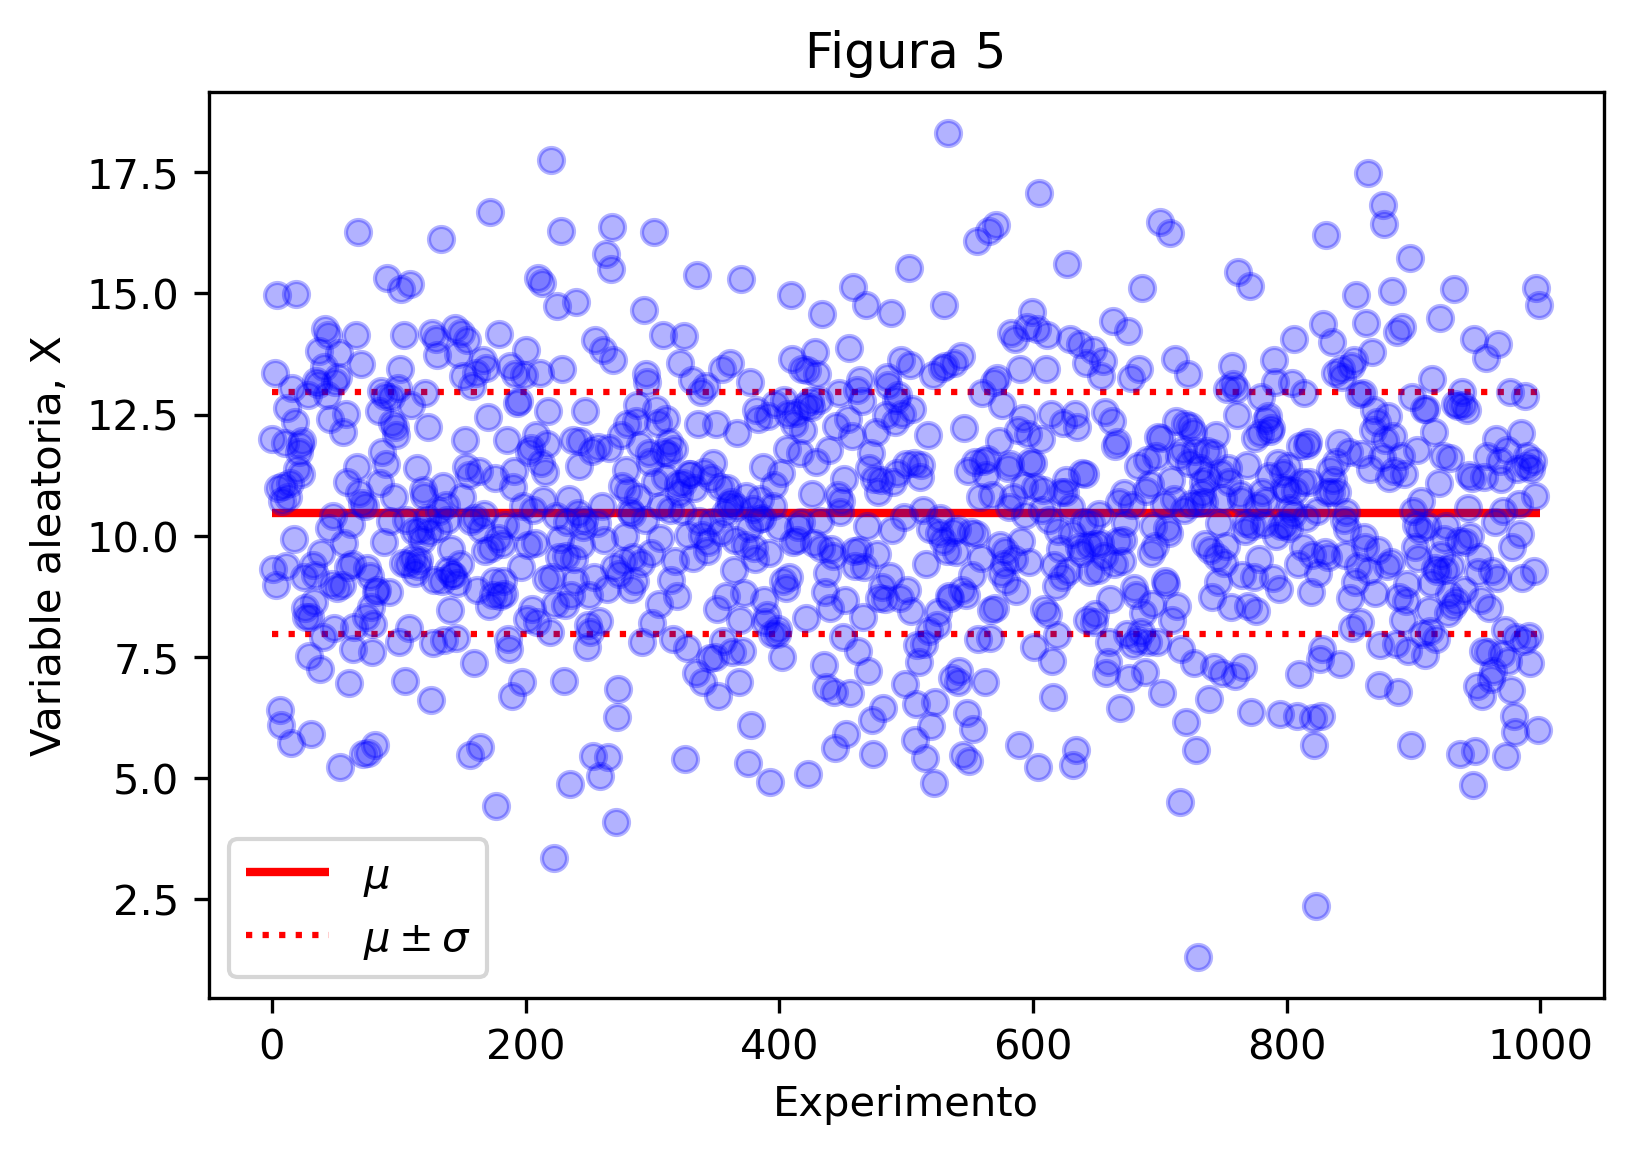

In [14]:
plotX(X, title='Figura 5')

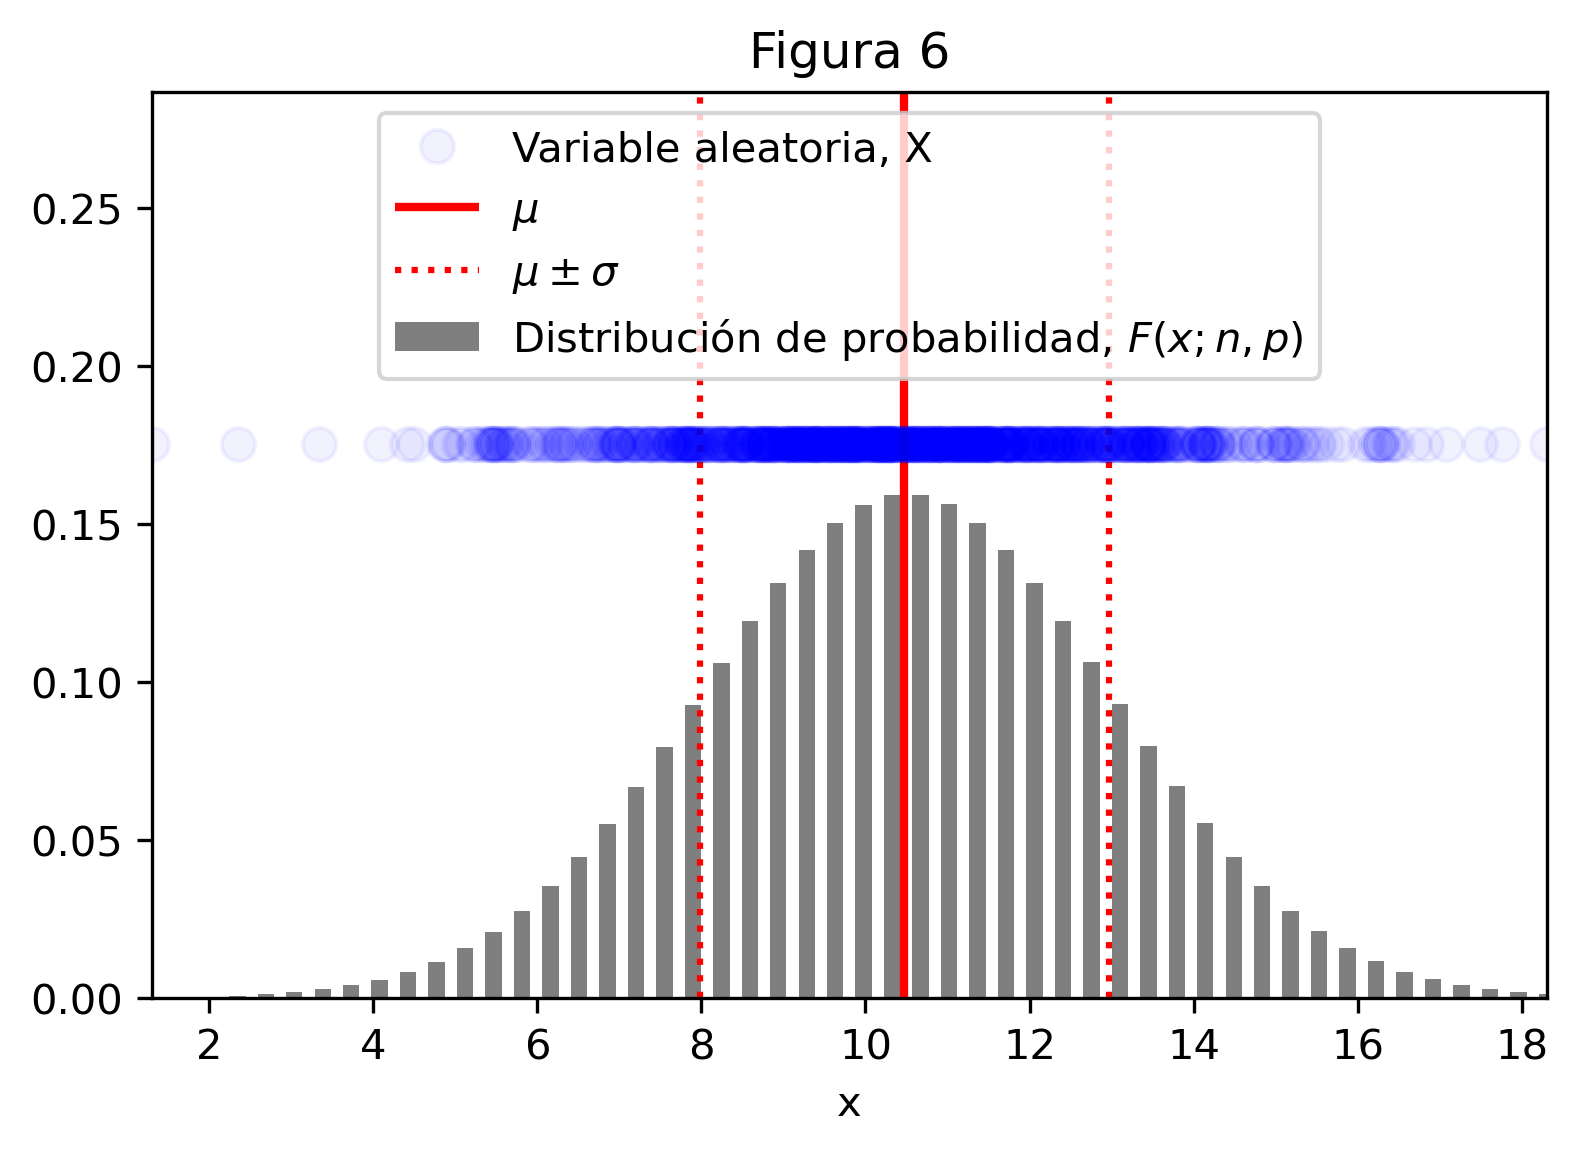

In [15]:
plotXF(X, F, title='Figura 6')

## 3. Preguntas de autoexplicación
3.1. ¿Por qué la variable graficada en la Figura 1 se puede considerar una variable aleatoria pero no para la Figura 2?

3.2. En la definición de la distribución de probabilidad, ítem 3, ¿qué diferencia existe entre $X$ y $x$.

3.3. Describa cada uno de los parámetros de la distribución de probabilidad de la variable binomial.

3.4. En el ítem 5.1 se utiliza np.random.binomial para obtener una muestra de una variable aleatoria binomial.  ¿Cuál es el resultado que se obtiene al ejecutar np.random.binomial?  En particular, ¿permite np.random.binomial obtener la distribución estadística de la variable aleatoria o el resultado de aplicar el comando es otro?  Explique.

3.5. Describa todos los elementos que aparecen en las Figuras 3 y 5. 

3.6. En las Figuras 4 y 6 se presentan valores de dos variables aleatorias, sus distribuciones de probabilidad, media y varianza.  ¿Cuál es el propósito de los circulos azules y las barras grises?  Explique.

end!